In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression 

In [33]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [35]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        #Fill missing values with the mode for categorical features
        train_data[column].fillna(train_data[column].mode()[0],inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0],inplace=True)
        else:
            #Fill missing values with the mean for numeric features
            train_data[column],fillna(train_data[column].mean(),inplace=True)
            if column in test_data.columns:
                test_data[column].fillna(test_data[column].mean(),inplace=True)

#Select features 
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd']
x = train_data[features]
y = train_data['SalePrice']

#Split the training data for validation
x_train, x_val, y_train,  y_val = train_test_split(x,y, test_size=0.2, random_state=42)


#Train the model
model = LinearRegression()
model.fit(x_train, y_train)

C:\Users\Hafsa\AppData\Local\Temp\ipykernel_8156\1686800071.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0],inplace=True)
C:\Users\Hafsa\AppData\Local\Temp\ipykernel_8156\1686800071.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

LinearRegression()

In [39]:
y_pred = model.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val,y_pred)

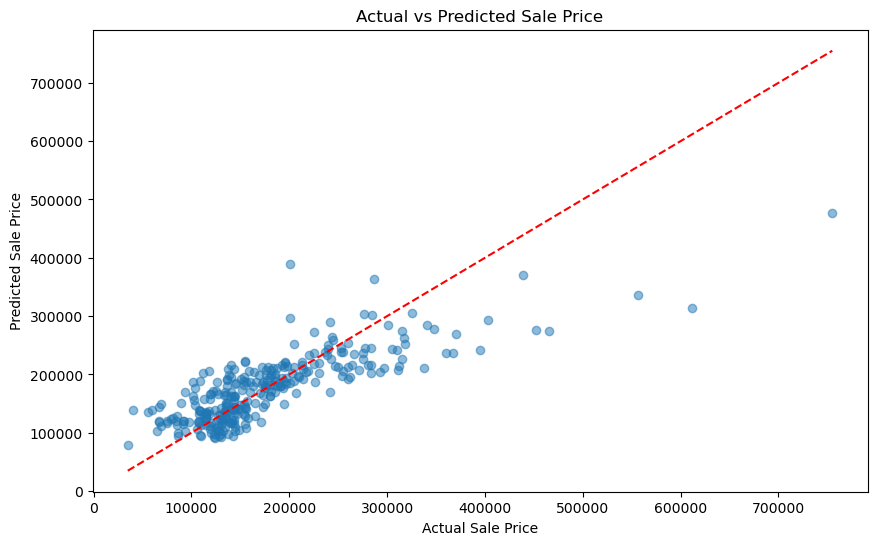

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

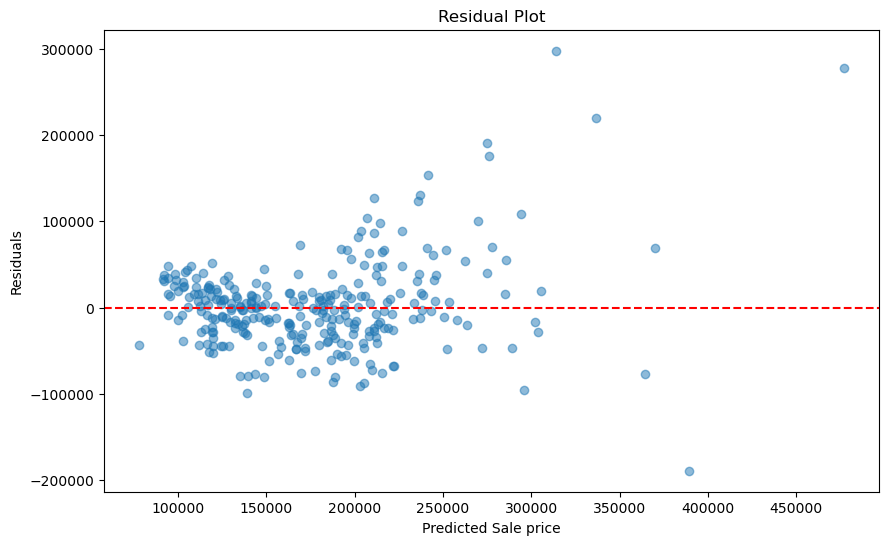

In [43]:
residuals = y_val - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Sale price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

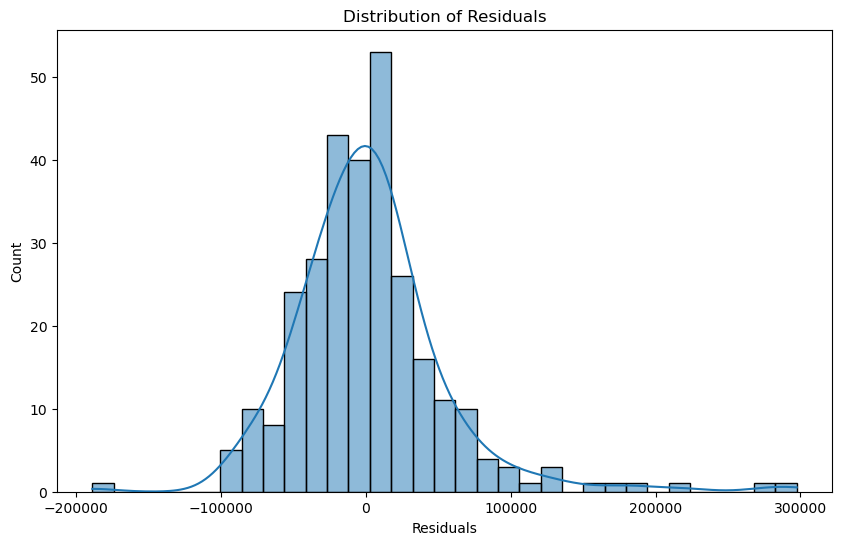

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

<Figure size 1200x800 with 0 Axes>

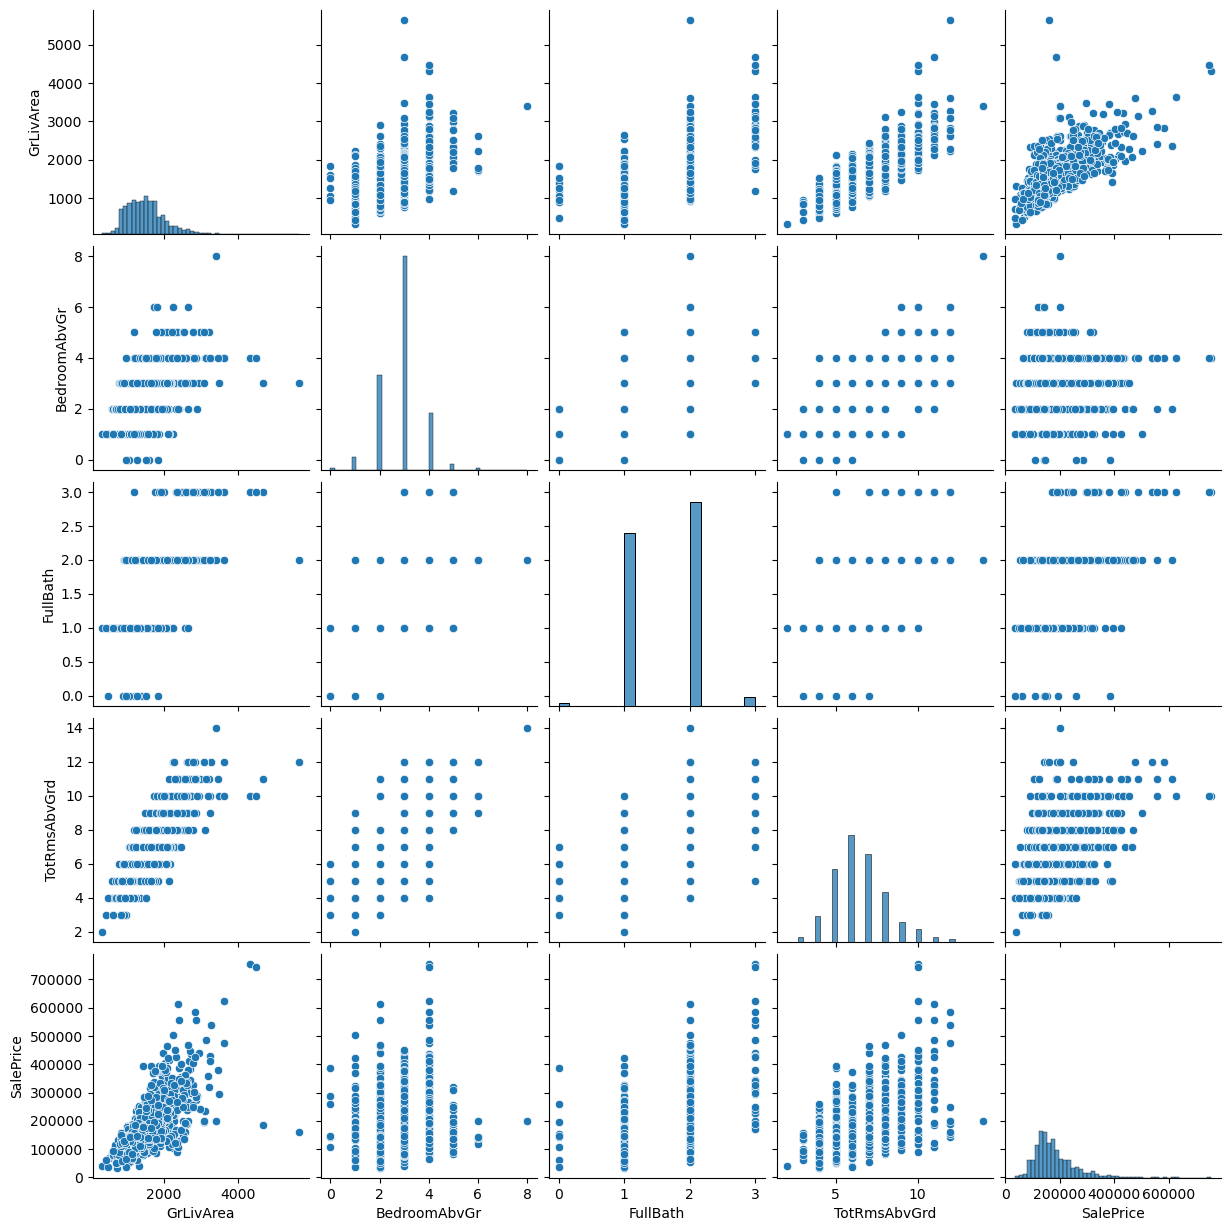

In [53]:
plt.figure(figsize=(12,8))
sns.pairplot(train_data[features + ['SalePrice']])
plt.show()

In [113]:
x_test = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})
example_prediction = model.predict(x_test)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

# Prepare the test data and make predictions
X_test = test_data[features]
test_predictions = model.predict(X_test)

# Save predictions
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- HalfBath
